In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("card-offer-data.csv")

df.drop('CustomerID', axis=1, inplace=True)

X = pd.get_dummies(df.drop('OfferAccepted', axis=1), drop_first=True)

y = df['OfferAccepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.92
Confusion Matrix:
 [[157   2]
 [ 14  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       159
           1       0.93      0.66      0.77        41

    accuracy                           0.92       200
   macro avg       0.92      0.82      0.86       200
weighted avg       0.92      0.92      0.91       200



c:\Users\jseha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
!pip install seaborn --upgrade


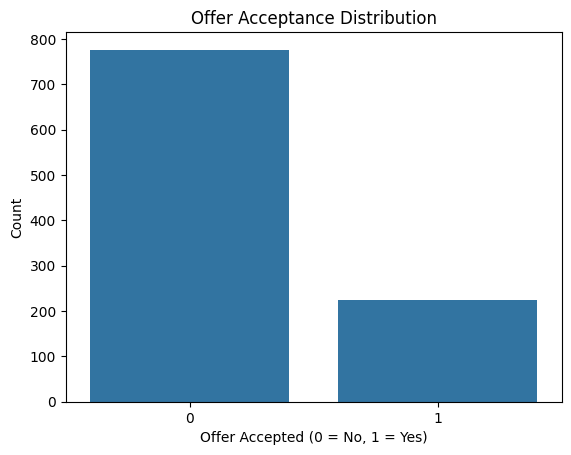

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='OfferAccepted')
plt.title('Offer Acceptance Distribution')
plt.xlabel('Offer Accepted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


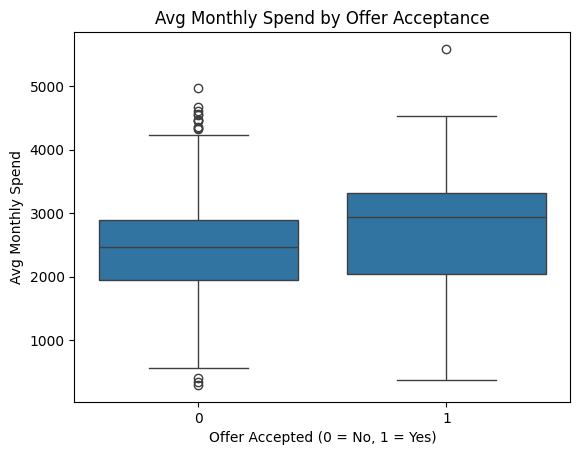

In [4]:
sns.boxplot(data=df, x='OfferAccepted', y='AvgMonthlySpend')
plt.title('Avg Monthly Spend by Offer Acceptance')
plt.xlabel('Offer Accepted (0 = No, 1 = Yes)')
plt.ylabel('Avg Monthly Spend')
plt.show()


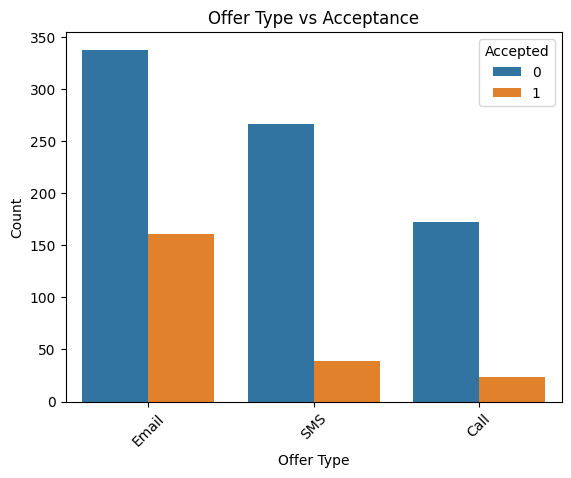

In [5]:
sns.countplot(data=df, x='OfferType', hue='OfferAccepted')
plt.title('Offer Type vs Acceptance')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accepted')
plt.show()



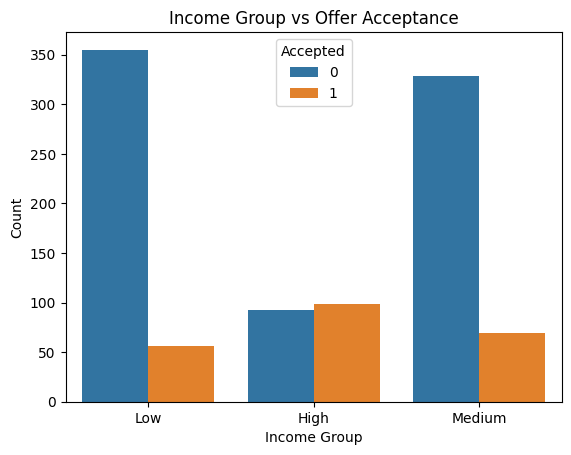

In [6]:
sns.countplot(data=df, x='IncomeGroup', hue='OfferAccepted')
plt.title('Income Group vs Offer Acceptance')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Accepted')
plt.show()

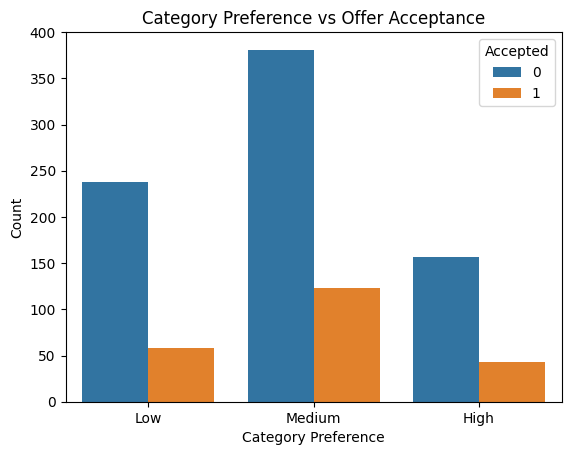

In [7]:
sns.countplot(data=df, x='CategoryPreference', hue='OfferAccepted')
plt.title('Category Preference vs Offer Acceptance')
plt.xlabel('Category Preference')
plt.ylabel('Count')
plt.legend(title='Accepted')
plt.show()


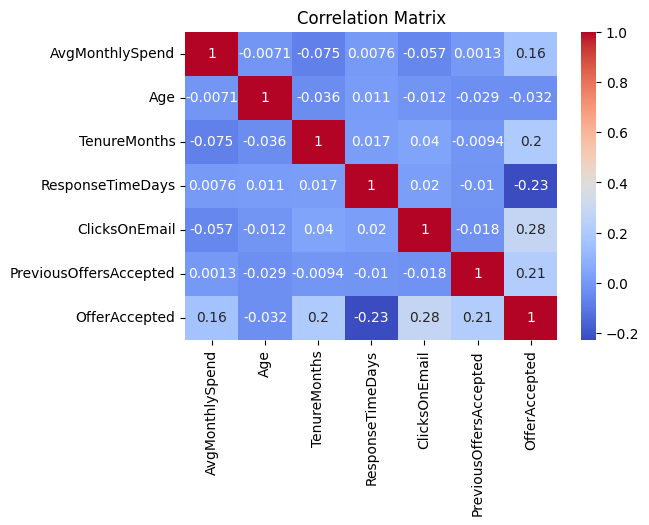

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
